In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\flora\Desktop\gym_membership_prediction_with_professional_status.csv")

In [3]:
df.head()

,User ID,Age,Gender,Annual Income,Membership Type,Membership Duration,Frequency of Visit,Preferred Time,Previous Membership,Marital Status,Location,Promotion Response,Health Condition,Membership Prediction,Professional,Professional Status
0,1,62,Other,135305,Premium,46,2,Afternoon,Yes,Married,Rural,Yes,Average,No,Late Career,Retired
1,2,65,Male,59056,Basic,26,6,Afternoon,Yes,Single,Suburban,Yes,Good,No,Retired,Retired
2,3,18,Male,63857,Basic,46,2,Afternoon,No,Married,Rural,Yes,Excellent,No,Student,Student
3,4,21,Male,135072,Basic,54,1,Evening,No,Married,Suburban,No,Good,Yes,Student,Student
4,5,21,Female,59344,Basic,36,5,Morning,Yes,Single,Suburban,No,Excellent,Yes,Student,Student


In [4]:
df.shape

(4000, 16)

In [5]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Annual Income', 'Membership Type',
       'Membership Duration', 'Frequency of Visit', 'Preferred Time',
       'Previous Membership', 'Marital Status', 'Location',
       'Promotion Response', 'Health Condition', 'Membership Prediction',
       'Professional', 'Professional Status'],
      dtype='object')

In [6]:
df["Gender"].value_counts()

Gender
Male      1840
Female    1800
Other      360
Name: count, dtype: int64

In [7]:
df["Membership Type"].value_counts()

Membership Type
Basic      2434
Premium    1164
VIP         402
Name: count, dtype: int64

In [8]:
df["Annual Income"].mean()

86346.917

In [9]:
df["Health Condition"].value_counts()

Health Condition
Good         1998
Average       790
Excellent     786
Poor          426
Name: count, dtype: int64

In [10]:
mem_grp=df.groupby(["Membership Type"])
mem_grp.get_group("Premium")

,User ID,Age,Gender,Annual Income,Membership Type,Membership Duration,Frequency of Visit,Preferred Time,Previous Membership,Marital Status,Location,Promotion Response,Health Condition,Membership Prediction,Professional,Professional Status
0,1,62,Other,135305,Premium,46,2,Afternoon,Yes,Married,Rural,Yes,Average,No,Late Career,Retired
5,6,57,Male,130879,Premium,49,2,Afternoon,No,Married,Suburban,No,Good,Yes,Late Career,Working Professional
8,9,39,Female,36287,Premium,15,6,Evening,No,Single,Urban,Yes,Good,Yes,Mid Career,Working Professional
10,11,54,Female,87173,Premium,56,4,Evening,Yes,Single,Suburban,No,Good,No,Late Career,Working Professional
17,18,56,Female,76436,Premium,22,2,Morning,Yes,Divorced,Urban,Yes,Average,No,Late Career,Working Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,3989,38,Other,104581,Premium,6,5,Morning,No,Married,Rural,No,Good,Yes,Mid Career,Working Professional
3990,3991,47,Male,40955,Premium,36,4,Afternoon,No,Single,Urban,No,Good,Yes,Mid Career,Working Professional
3995,3996,40,Male,127601,Premium,15,1,Afternoon,Yes,Single,Urban,No,Good,No,Mid Career,Working Professional
3996,3997,40,Female,77944,Premium,34,1,Evening,No,Single,Urban,No,Average,No,Mid Career,Working Professional


In [11]:
a=mem_grp["Annual Income"].value_counts().loc["Premium"].head(50)
a

Annual Income
141468    2
60885     2
64153     2
48085     2
40687     2
40964     2
47321     2
56921     2
49066     1
48956     1
47649     1
49344     1
47726     1
57195     1
49230     1
57092     1
56655     1
47885     1
47970     1
48031     1
57060     1
56932     1
48098     1
47365     1
48196     1
48456     1
56887     1
48526     1
49107     1
48610     1
48632     1
55848     1
57410     1
49378     1
47224     1
43633     1
43756     1
43768     1
44307     1
44415     1
44552     1
44949     1
44985     1
44988     1
45086     1
45307     1
57491     1
45499     1
45860     1
46043     1
Name: count, dtype: int64

In [12]:
women_members=mem_grp["Gender"].apply(lambda x: x.str.contains("Female").sum())
women_members

Membership Type
Basic      1083
Premium     536
VIP         181
Name: Gender, dtype: int64

In [13]:
guy_members=mem_grp["Gender"].apply(lambda x: x.str.contains("Male").sum())
guy_members

Membership Type
Basic      1120
Premium     537
VIP         183
Name: Gender, dtype: int64

In [14]:
other_members=mem_grp["Gender"].apply(lambda x: x.str.contains("Other").sum())
other_members

Membership Type
Basic      231
Premium     91
VIP         38
Name: Gender, dtype: int64

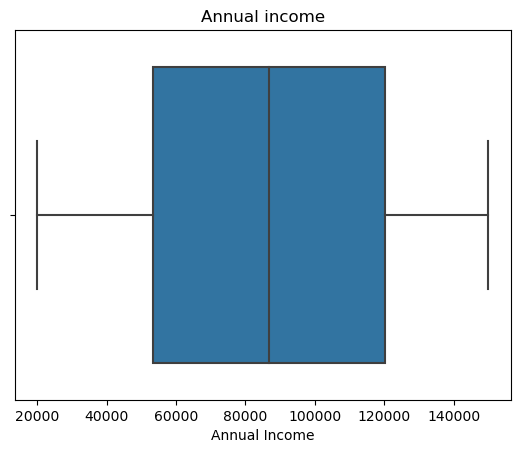

In [15]:
sns.boxplot(x = df["Annual Income"]).set_title("Annual income")
plt.show()

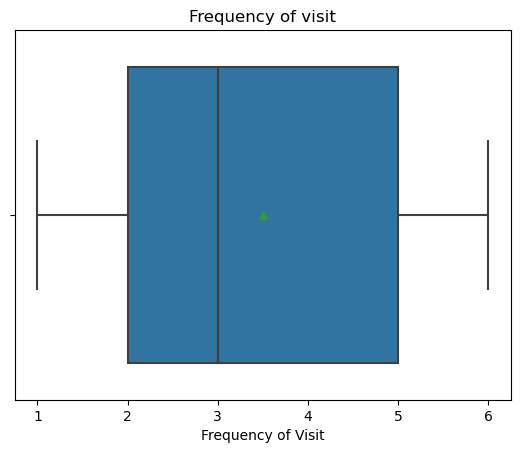

In [45]:
sns.boxplot(x = df["Frequency of Visit"], showmeans=True).set_title("Frequency of visit")
plt.show()

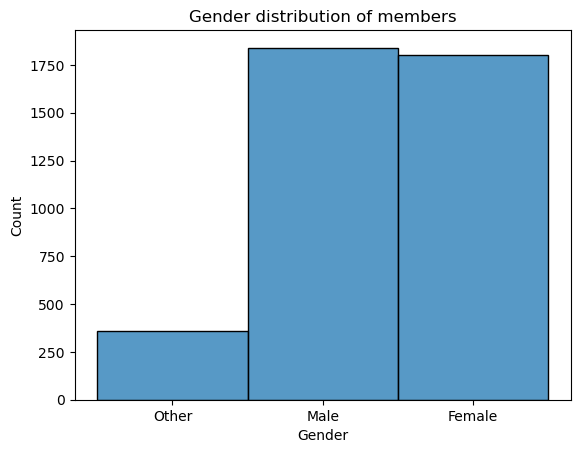

In [17]:
sns.histplot(df["Gender"], kde = False).set_title("Gender distribution of members")
plt.show()

In [18]:
df["Marital Status"].value_counts()

Marital Status
Single      1996
Married     1593
Divorced     332
Widowed       79
Name: count, dtype: int64

In [19]:
mar_grp=df.groupby(["Marital Status"])
prem_mem=mar_grp["Membership Type"].apply(lambda x: x.str.contains("Premium").sum())
prem_mem

Marital Status
Divorced     90
Married     470
Single      579
Widowed      25
Name: Membership Type, dtype: int64

In [20]:
bas_mem=mar_grp["Membership Type"].apply(lambda x: x.str.contains("Basic").sum())
bas_mem

Marital Status
Divorced     208
Married      960
Single      1216
Widowed       50
Name: Membership Type, dtype: int64

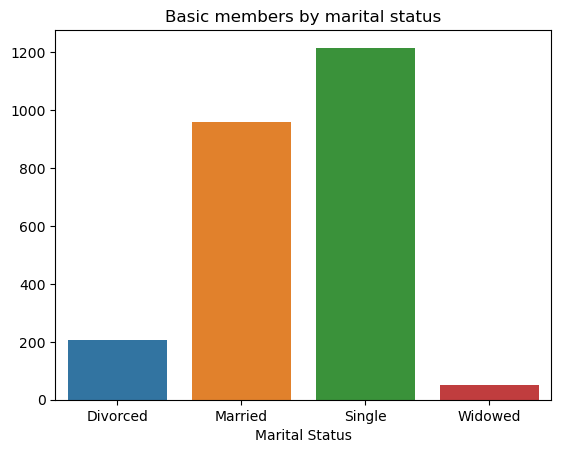

In [21]:
sns.barplot(x=bas_mem.index, y=bas_mem.values).set_title("Basic members by marital status")
plt.show()

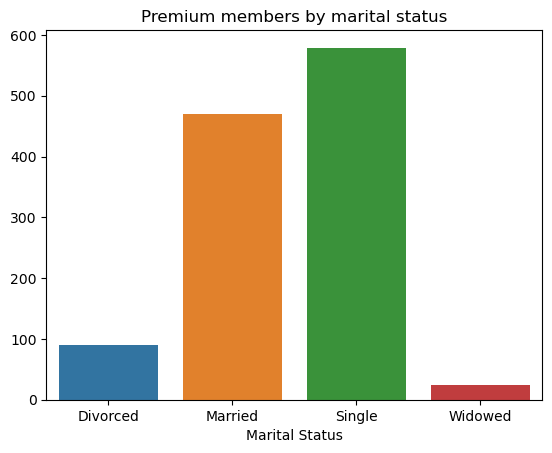

In [22]:
sns.barplot(x=prem_mem.index, y=prem_mem.values).set_title("Premium members by marital status")
plt.show()

In [23]:
df["Membership Type"].value_counts()

Membership Type
Basic      2434
Premium    1164
VIP         402
Name: count, dtype: int64

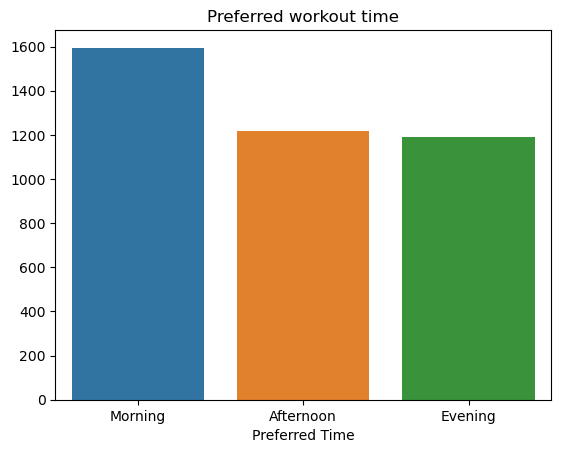

In [24]:
b=df["Preferred Time"].value_counts()
sns.barplot(x=b.index, y=b.values).set_title("Preferred workout time")
plt.show()

In [25]:
time_pref_m=mem_grp["Preferred Time"].apply(lambda x: x.str.contains("Morning").sum())
time_pref_m

Membership Type
Basic      975
Premium    435
VIP        185
Name: Preferred Time, dtype: int64

In [26]:
gen_grp=df.groupby(["Gender"])
time_prf=gen_grp["Preferred Time"].apply(lambda x: x.str.contains("Morning").sum())
time_prf

Gender
Female    712
Male      728
Other     155
Name: Preferred Time, dtype: int64

<Axes: >

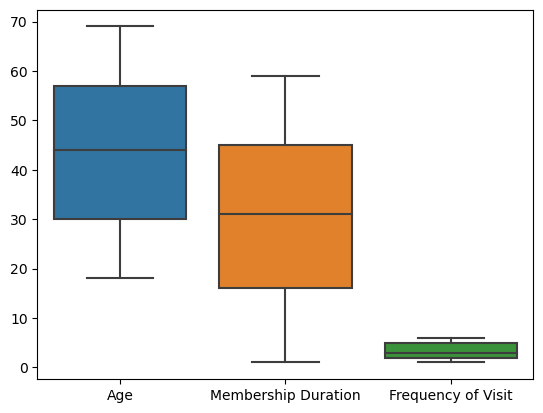

In [28]:
sns.boxplot(data=df.loc[:, ["Age", "Membership Duration", "Frequency of Visit"]])

<Axes: >

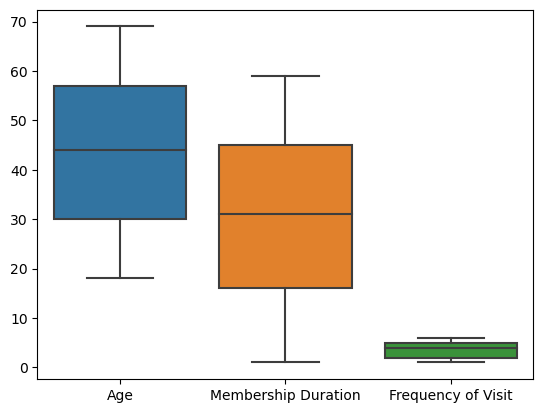

In [29]:
sns.boxplot(data=df.loc[df['Gender'] == 'Female', ["Age", "Membership Duration", "Frequency of Visit"]])

<Axes: xlabel='Membership Duration', ylabel='Gender'>

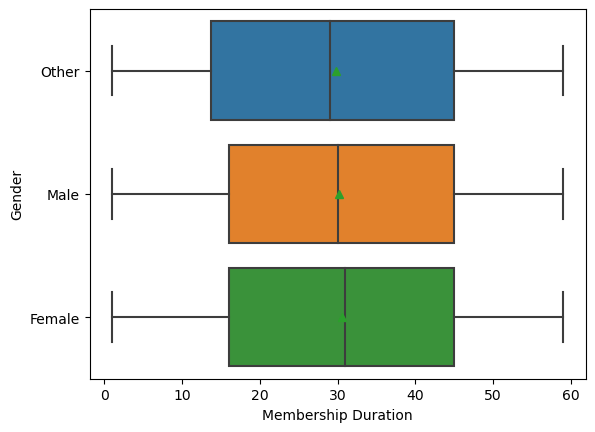

In [43]:
sns.boxplot(x="Membership Duration", y="Gender", data=df, showmeans=True)

<Axes: xlabel='Annual Income', ylabel='Gender'>

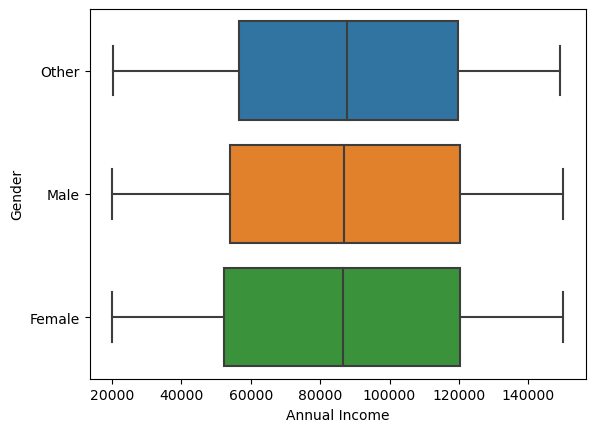

In [32]:
sns.boxplot(x="Annual Income", y="Gender", data=df)

<Axes: xlabel='Annual Income', ylabel='Health Condition'>

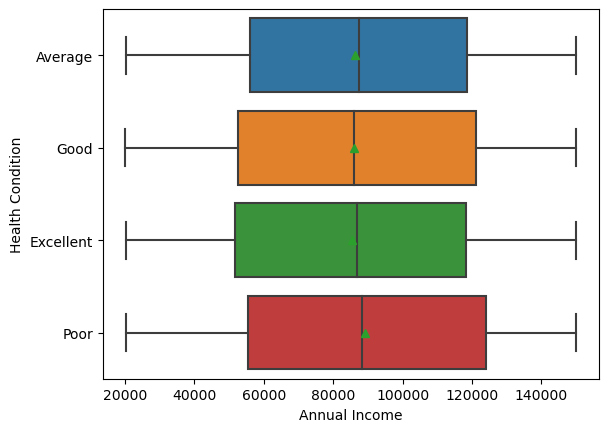

In [42]:
sns.boxplot(x="Annual Income", y="Health Condition", data=df, showmeans=True)

<Axes: xlabel='Frequency of Visit', ylabel='Marital Status'>

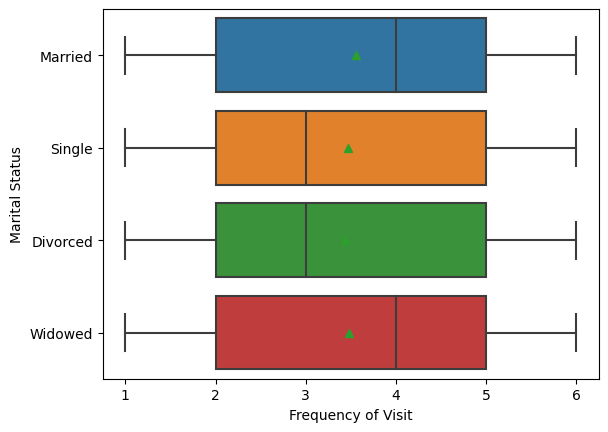

In [41]:
sns.boxplot(x="Frequency of Visit", y="Marital Status", data=df, showmeans=True)

<Axes: xlabel='Frequency of Visit', ylabel='Health Condition'>

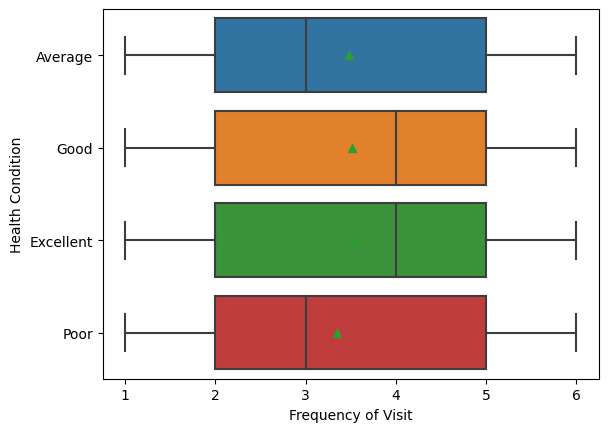

In [40]:
sns.boxplot(x="Frequency of Visit", y="Health Condition", data=df, showmeans=True)

<Axes: xlabel='Frequency of Visit', ylabel='Membership Type'>

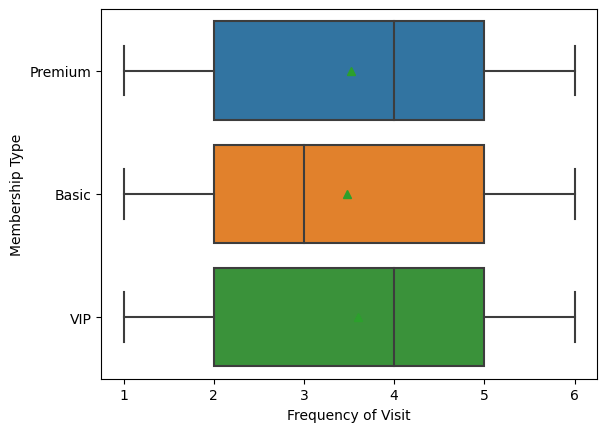

In [44]:
sns.boxplot(x="Frequency of Visit", y="Membership Type", data=df, showmeans=True)

<Axes: xlabel='Age', ylabel='Health Condition'>

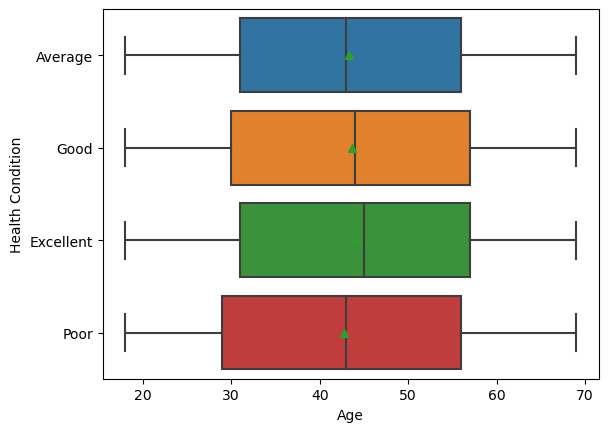

In [39]:
sns.boxplot(x="Age", y="Health Condition", data=df, showmeans=True)